In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter

### ICO (*International Coffee Organization*) website data preprocessing in Coffee production category

In [46]:
# Update excel file from ICO website
url_production = r"https://www.ico.org/historical/1990%20onwards/Excel/1a%20-%20Total%20production.xlsx"

# Function for data extraction and simple manipulation

def reading_production_data(*args):
    
    # Upload data, preliminary transforming
    df_production = pd.DataFrame()
    df_production = pd.read_excel(url_production, header=3)
    df_production = df_production.rename(columns={"Unnamed: 1" : "Coffee type", "Crop year" : "Country"})
    
    return df_production

df_production = reading_production_data()

df_production

C:\Users\dell\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.8810,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,(R/A),50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
3,Bolivia (Plurinational State of),(A),122.7770,103.5360,120.2350,50.8230,116.9440,142.4850,124.5790,140.7190,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
4,Brazil,(A/R),27285.6286,27293.4934,34603.3542,28166.9786,28192.0470,18060.2022,29196.7430,26148.0040,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Viet Nam,(R/A),1310.2880,1437.8480,2340.4470,3020.2160,3631.6090,3970.0860,5752.4810,6978.9420,...,19999.9999,26499.6111,23402.1057,27609.7814,27240.5219,31090.0419,27819.1762,33432.4990,30283.0748,30487.1644
60,Yemen,(A),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,161.1675,185.0677,187.5251,187.2981,178.3814,156.2460,143.4533,132.1281,85.5762,91.4278
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Total,NaN,93230.0596,101266.6844,98524.0942,91761.0531,93313.7693,87320.8691,103307.8761,99887.1611,...,140077.5378,141327.3877,151183.5121,153910.3398,150301.6726,156126.4745,162319.9801,163693.1027,172460.8203,165053.0157


In [47]:
# Function for data preprocessing (cleaning, value change, deduplication, droping rows and values)

def data_production_preprocesing(*args):
    
    global df_production
    
    # Data preprocesing, variable rename
    df_production["Coffee type"].value_counts()
    df_production["Coffee type"].replace({"(A)" : "Arabica", "(R)" : "Robusta", "(R/A)" : "Robusta/Arabica",
                           "(A/R)" : "Arabica/Robusta", 0 : "Arabica"}, inplace=True)
    df_production.dropna(how='all', inplace=True)
    df_production['Coffee type'].isna()
    df_production.drop(index=[1, 17, 26, 62, 63], axis=0, inplace=True)
    df_production.reset_index(drop=True)
    
    # Rounding numeric values
    df_production_1 = df_production.iloc[:, 2:32]
    df_production_1.reset_index(drop=True)
    df_production_2 = df_production.iloc[:, 0:2]
    df_production_2.reset_index(drop=True)
    
    df_production_1 = df_production_1.apply(lambda x : round(x, 0))
    
    # In order to obtain kg values, data have to be multiplaying by 60 kg coffee bags  
    df_production_1 = df_production_1.apply(lambda x : x * 60)
    
    # Data type change from float to intiger
    df_production_1[[col for col in df_production_1.columns if df_production_1[col].dtypes == float]] = \
    df_production_1[[col for col in df_production_1.columns if df_production_1[col].dtypes == float]].astype(int)
    df_production = pd.concat([df_production_2, df_production_1], axis=1).reset_index(drop=True)
    
    # Total consumption
    df_production['Total_production'] = df_production.iloc[:, 2:33].sum(axis=1)
    
    return df_production

df_production = data_production_preprocesing()

df_production

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3000,4740,4680,1980,4620,3720,4260,3840,...,1740,1980,2100,2340,2460,2700,2100,2520,3120,82080
1,Bolivia (Plurinational State of),Arabica,7380,6240,7200,3060,7020,8520,7500,8460,...,7920,6300,7200,6000,5040,4680,5040,4980,4860,207000
2,Brazil,Arabica/Robusta,1637160,1637580,2076180,1690020,1691520,1083600,1751820,1568880,...,2915520,3325080,3281340,3198300,3172260,3407280,3164400,3907860,3492660,75082980
3,Burundi,Arabica/Robusta,29220,40020,37200,23580,39840,26040,24060,15000,...,12240,24360,9780,14880,16140,11760,12120,12240,16320,623640
4,Ecuador,Arabica/Robusta,90240,127440,71100,124140,142560,113280,119580,71460,...,49500,49680,39960,38640,38640,38700,37440,29760,33540,1900380
5,Indonesia,Robusta/Arabica,446460,509580,334140,404580,322080,274380,493260,457260,...,413340,784200,774060,656760,755100,692460,651120,577080,685980,15404880
6,Madagascar,Robusta,58920,55980,67320,26520,38460,47100,50940,37440,...,35100,30000,35040,30060,24840,27180,24240,22740,22980,1045560
7,Malawi,Arabica,6300,7440,8220,3720,5040,5460,2940,3660,...,1560,1380,1680,1500,1260,1200,840,780,960,82260
8,Papua New Guinea,Arabica/Robusta,57780,44820,54000,61140,68340,60120,65340,64440,...,84840,42960,50100,47880,42720,70260,44040,55800,45120,1803120
9,Paraguay,Arabica,7860,4800,3240,4020,1500,1560,1860,2940,...,1200,1200,1200,1200,1200,1200,1200,1200,1200,62220


### Barchart *Total coffee production from 1990 to 2020 year*

C:\Users\dell\AppData\Local\Temp/ipykernel_20276/38650709.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


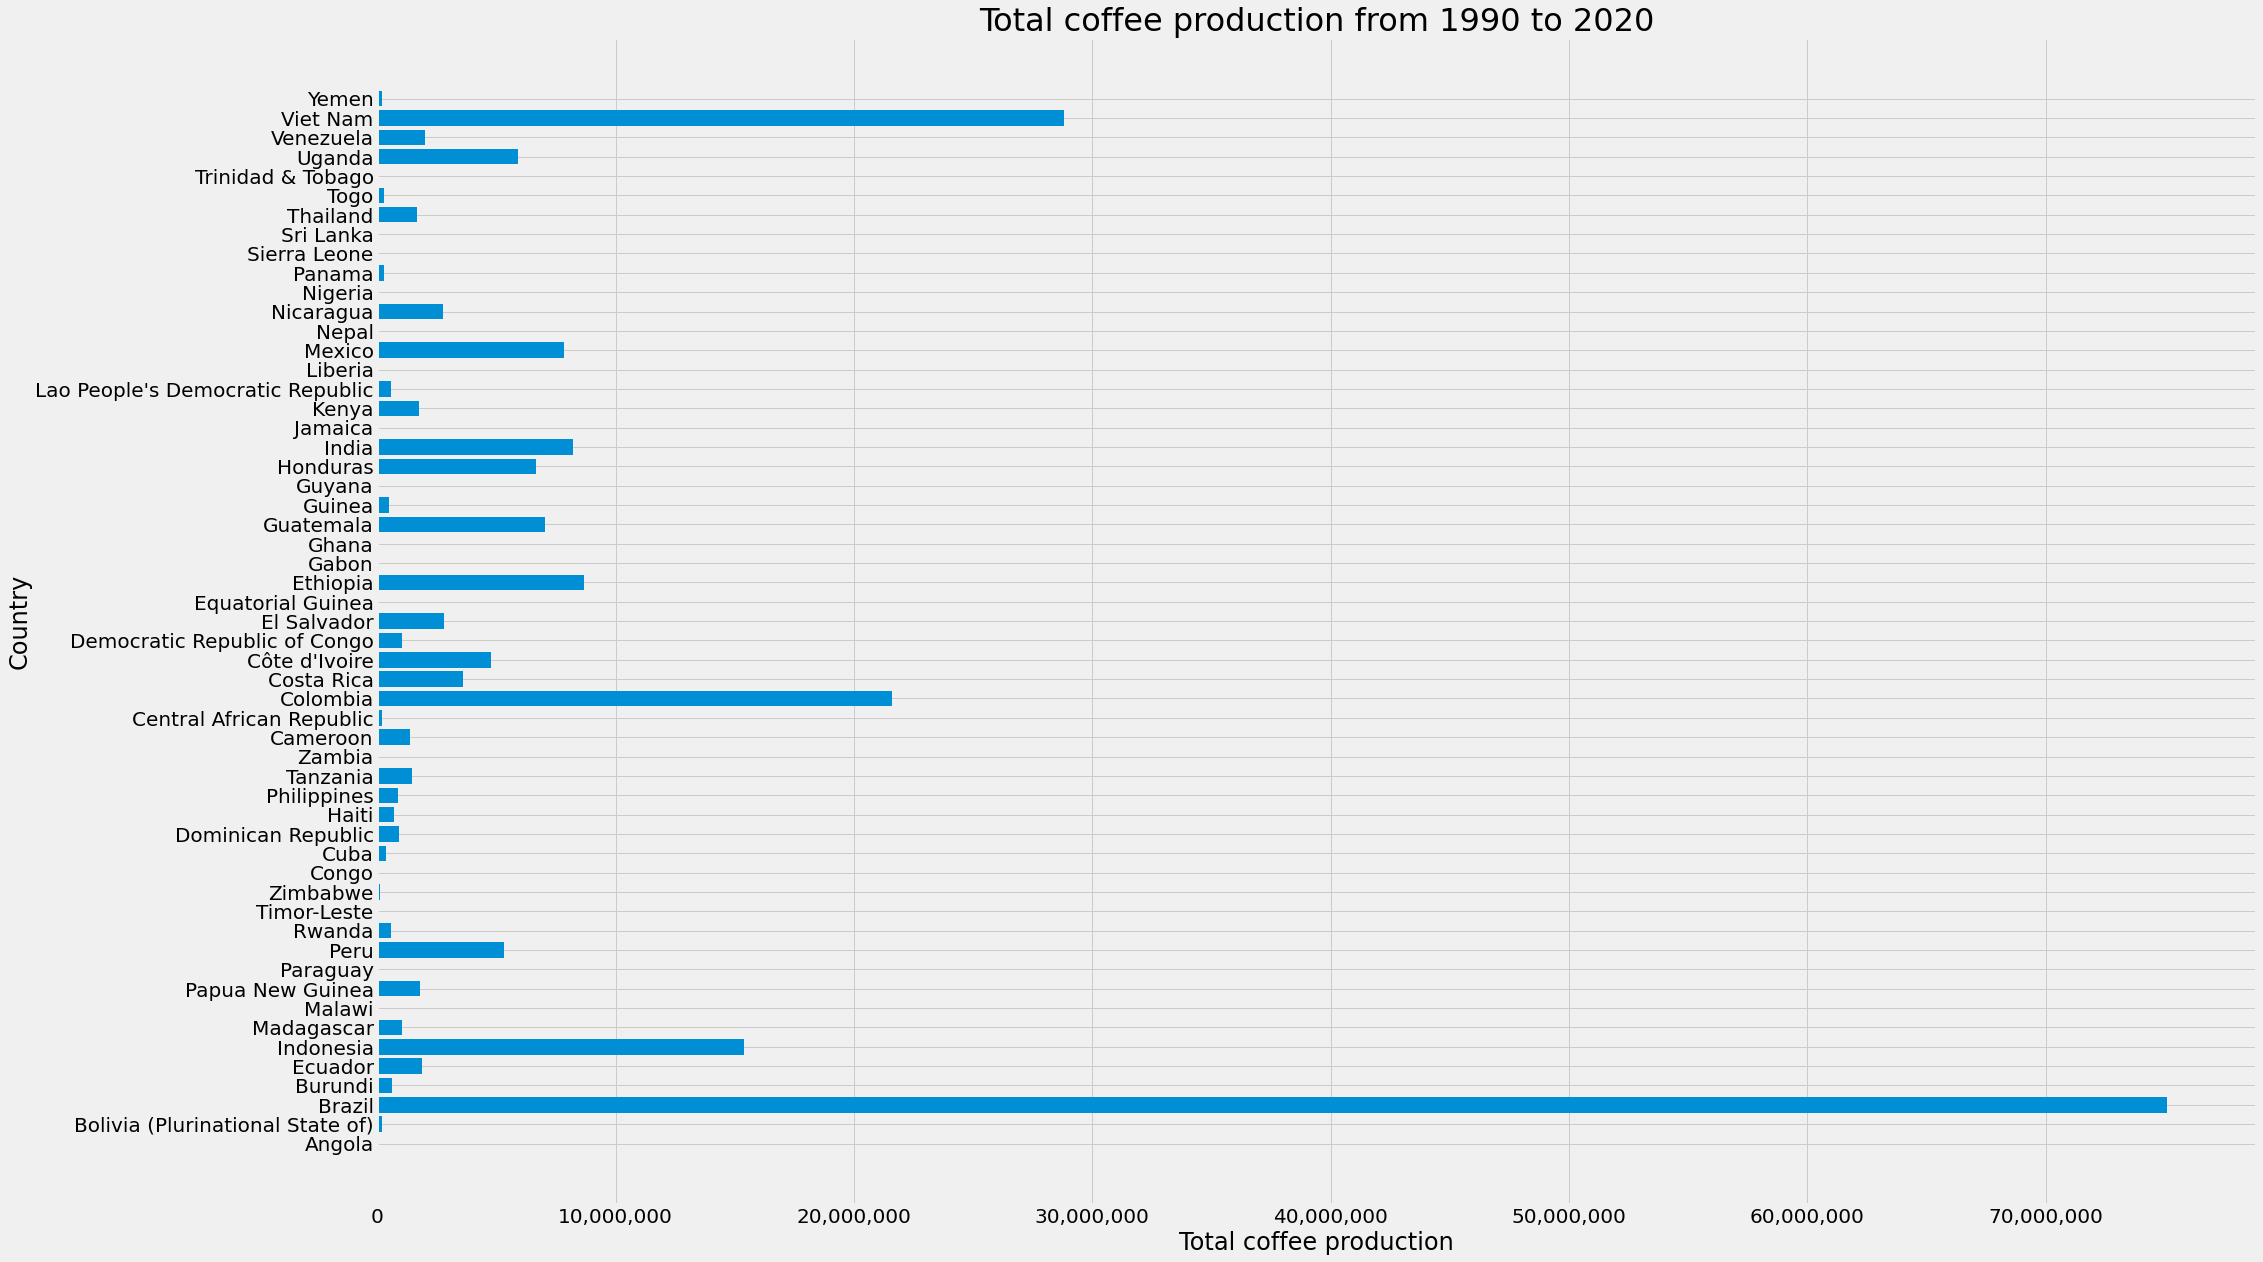

In [58]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(30, 20))

#Horizontal barchart
plt.barh(df_production["Country"], df_production["Total_production"])

# X-axis value size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Label title
plt.xlabel('Total coffee production', fontsize=24) 
plt.ylabel('Country', fontsize=24)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#Title label
plt.title("Total coffee production from 1990 to 2020", fontsize=32)

plt.show()

In [59]:
url_domestic_consumption = r"https://www.ico.org/historical/1990%20onwards/Excel/1b%20-%20Domestic%20consumption.xlsx"

In [60]:
def reading_consumption_data(*args):
    
    # Upload data, preliminary cleaning
    df_domestic_consumption = pd.DataFrame()
    df_domestic_consumption = pd.read_excel(url_domestic_consumption, header=3)
    df_domestic_consumption = df_domestic_consumption.rename(columns={'Unnamed: 1': 'Coffee type', 
                                                                      "Crop year" : "Country"})
    
    return df_domestic_consumption

df_domestic_consumption = reading_consumption_data()
df_domestic_consumption

C:\Users\dell\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,10408.000,10707.600,11212.200,11452.743,11506.499,12334.100,13235.500,13804.500,...,23439.42,24345.726,25170.701,25262.529,25658.914,25948.29,26757.4900,27635.990,27900.490,27701.490
2,Angola,(R/A),20.000,30.000,35.000,20.000,25.000,10.000,20.000,40.000,...,30.00,30.000,30.000,30.000,30.000,30.00,30.0000,30.000,30.000,30.000
3,Bolivia (Plurinational State of),(A),25.000,27.000,27.500,28.500,29.500,30.500,31.500,32.500,...,47.50,49.000,50.500,52.000,53.500,55.00,57.0000,58.500,60.000,61.000
4,Brazil,(A/R),8200.000,8500.000,8900.000,9100.000,9300.000,10100.000,11000.000,11500.000,...,19132.00,19720.000,20330.000,20085.000,20333.000,20508.00,21225.0000,21997.000,22200.000,22000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Viet Nam,(R/A),150.000,230.000,250.000,267.000,267.000,281.845,297.516,314.058,...,1583.00,1650.000,1825.000,2000.000,2200.000,2300.00,2400.0000,2500.000,2600.000,2650.000
60,Yemen,(A),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,130.00,130.000,130.000,130.000,125.000,115.00,100.0000,90.000,65.000,64.000
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Total,NaN,19509.211,20228.097,20951.452,21097.906,21360.166,22602.572,23512.590,24271.040,...,41646.19,43192.482,44652.513,45323.874,46473.695,47349.20,48334.1704,49685.816,50244.654,49981.524


In [61]:
def data_preprocesing(*args):
    
    global df_domestic_consumption
    # Data preprocesing, variable rename
    df_domestic_consumption["Coffee type"].value_counts()
    df_domestic_consumption["Coffee type"].replace({"(A)" : "Arabica", "(R)" : "Robusta", "(R/A)" : "Robusta/Arabica",
                           "(A/R)" : "Arabica/Robusta"}, inplace=True)
    df_domestic_consumption["Coffee type"].value_counts()
    df_domestic_consumption.dropna(how='all', inplace=True)
    df_domestic_consumption['Coffee type'].isna()
    df_domestic_consumption.drop(index=[1, 17, 26, 62, 63], axis=0, inplace=True)
    df_domestic_consumption.reset_index(drop=True)
    
    # Rounding numeric values
    df_domestic_consumption_1 = df_domestic_consumption.iloc[:, 2:32]
    df_domestic_consumption_1.reset_index(drop=True)
    df_domestic_consumption_2 = df_domestic_consumption.iloc[:, 0:2]
    df_domestic_consumption_2.reset_index(drop=True)
    
    # In order to obtain kg values, data have to be multiplaying by 60 kg coffee bags
    df_domestic_consumption_1 = df_domestic_consumption_1.apply(lambda x : x * 60)
    
    # Data type change from float to intiger
    df_domestic_consumption_1[[col for col in df_domestic_consumption_1.columns if df_domestic_consumption_1[col].dtypes == float]] = \
    df_domestic_consumption_1[[col for col in df_domestic_consumption_1.columns if df_domestic_consumption_1[col].dtypes == float]].astype(int)
    df_domestic_consumption = pd.concat([df_domestic_consumption_2, df_domestic_consumption_1], axis=1).reset_index(drop=True)
    
    # Total consumption
    df_domestic_consumption['Total_domestic_consumption'] = df_domestic_consumption.iloc[:, 2:33].sum(axis=1)
    
    return df_domestic_consumption

df_domestic_consumption = data_preprocesing()

df_domestic_consumption

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200,1800,2100,1200,1500,600,1200,2400,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,46500
1,Bolivia (Plurinational State of),Arabica,1500,1620,1650,1710,1770,1830,1890,1950,...,2940,3030,3120,3210,3300,3420,3510,3600,3660,75180
2,Brazil,Arabica/Robusta,492000,510000,534000,546000,558000,606000,660000,690000,...,1183200,1219800,1205100,1219980,1230480,1273500,1319820,1332000,1320000,27824700
3,Burundi,Arabica/Robusta,120,96,102,114,120,120,120,120,...,120,120,120,120,120,120,120,120,120,3409
4,Ecuador,Arabica/Robusta,21000,21000,21000,21000,21000,21000,18000,18000,...,9000,9000,9300,9300,9300,9300,9300,9300,8940,381540
5,Indonesia,Robusta/Arabica,74520,76800,79140,81540,84000,86580,89160,91920,...,220020,234000,255000,265020,273000,279000,285000,288000,288360,4920480
6,Madagascar,Robusta,21000,18000,21000,21600,9999,10020,10020,10020,...,27000,25800,24600,23400,22200,21600,21900,22500,22500,588705
7,Malawi,Arabica,120,120,120,120,120,120,120,120,...,60,60,60,60,60,60,60,60,60,2340
8,Papua New Guinea,Arabica/Robusta,180,180,180,120,120,120,120,120,...,74,102,122,115,108,120,120,120,120,3606
9,Paraguay,Arabica,900,900,900,1200,1200,1200,1200,1200,...,1200,1200,1200,1200,1200,1200,1200,1200,1200,35100


C:\Users\dell\AppData\Local\Temp/ipykernel_20276/3449310112.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


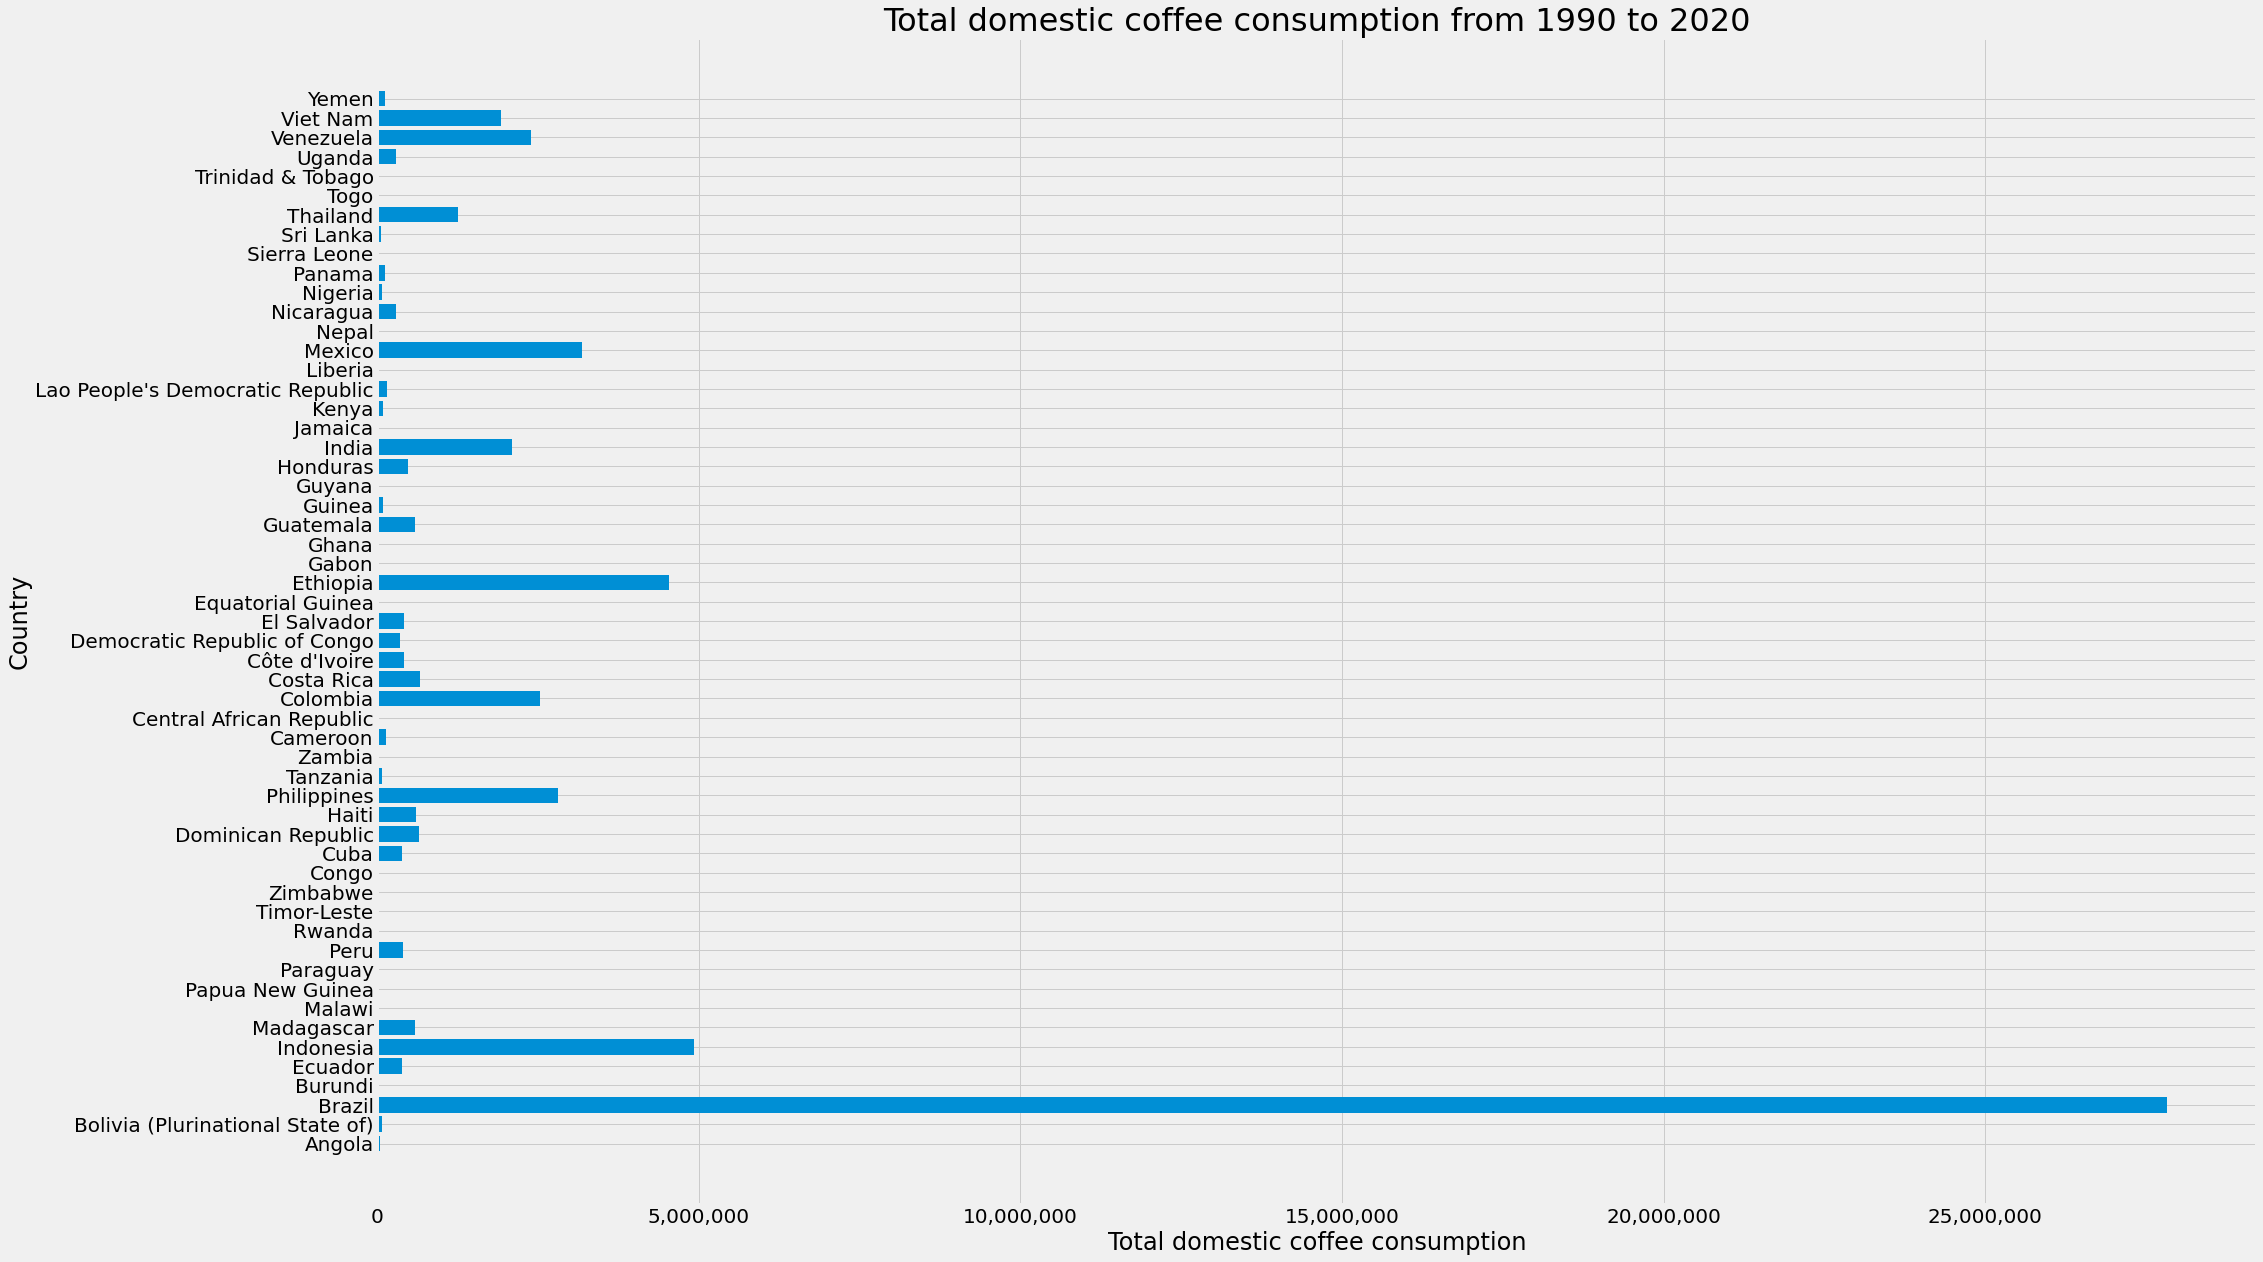

In [63]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(30, 20))

#Horizontal barchart
plt.barh(df_domestic_consumption["Country"], df_domestic_consumption["Total_domestic_consumption"])

# X-axis value size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Label title
plt.xlabel('Total domestic coffee consumption', fontsize=24) 
plt.ylabel('Country', fontsize=24)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#Title label
plt.title("Total domestic coffee consumption from 1990 to 2020", fontsize=32)

plt.show()